[View in Colaboratory](https://colab.research.google.com/github/ThreeOne31/CNN_Bird_Species_Classification/blob/master/my_SVM.ipynb)

In [1]:
!git clone https://github.com/MbeleLebohang-uct/birds-data.git

Cloning into 'birds-data'...
remote: Enumerating objects: 12013, done.
remote: Total 12013 (delta 0), reused 0 (delta 0), pack-reused 12013
Receiving objects: 100% (12013/12013), 1.07 GiB | 53.38 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (11800/11800), done.


In [2]:
#!ls birds-data/images
!rm -r workingDIR
!mkdir workingDIR
!mkdir model
!cp -r birds-data/images/001.Black_footed_Albatross workingDIR
#!cp -r birds-data/images/002.Laysan_Albatross workingDIR
#!cp -r birds-data/images/003.Sooty_Albatross workingDIR
!cp -r birds-data/images/020.Yellow_breasted_Chat workingDIR
!cp -r birds-data/images/084.Red_legged_Kittiwake  workingDIR
!cp -r birds-data/images/085.Horned_Lark workingDIR

#002.Laysan_Albatross

#!cp -r workingDIR/085.Horned_Lark	birds-data/images
#!ls model
#!mkdir workingDIR
#!cd birds-data/images

!rm -r birds-data
!ls workingDIR

#!cat > model.pkl

rm: cannot remove 'workingDIR': No such file or directory
001.Black_footed_Albatross  084.Red_legged_Kittiwake
020.Yellow_breasted_Chat    085.Horned_Lark


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] ..................... C=1, kernel=linear, score=0.750000 -  56.6s
[CV] C=1, kernel=linear ..............................................
[CV] ..................... C=1, kernel=linear, score=0.578947 -  57.6s
[CV] C=1, kernel=linear ..............................................
[CV] ..................... C=1, kernel=linear, score=0.888889 -  58.8s
[CV] C=1, kernel=linear ..............................................
[CV] ..................... C=1, kernel=linear, score=0.523810 - 1.1min
[CV] C=1, kernel=linear ..............................................
[CV] ..................... C=1, kernel=linear, score=0.722222 -  56.1s
[CV] C=1, kernel

[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:  2.0min remaining:   50.2s


[CV] C=1, kernel=linear ..............................................
[CV] ..................... C=1, kernel=linear, score=0.444444 - 1.0min
[CV] ..................... C=1, kernel=linear, score=0.777778 -  32.1s
[CV] ..................... C=1, kernel=linear, score=0.647059 -  32.8s


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  2.5min finished



Best parameters set:
{'C': 1, 'kernel': 'linear'}

Confusion matrix:
Labels: [,0,,, ,1,,, ,2,,, ,3,]

[[ 6  0  0  2]
 [ 0  7  3  1]
 [ 2  1  7  1]
 [ 2  4  1 10]]

Classification report:
                            precision    recall  f1-score   support

  020.Yellow_breasted_Chat       0.60      0.75      0.67         8
001.Black_footed_Albatross       0.58      0.64      0.61        11
  084.Red_legged_Kittiwake       0.64      0.64      0.64        11
           085.Horned_Lark       0.71      0.59      0.65        17

               avg / total       0.65      0.64      0.64        47



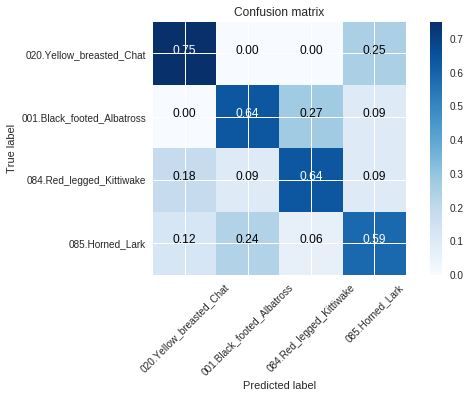

In [5]:
"""
Created on Tue Aug 28 21:51:56 2018

@author: Khomo
"""

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import PIL.Image
import itertools
import pickle

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import array_to_img, img_to_array, load_img

from sklearn import cross_validation, grid_search
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.externals import joblib


#-------------------------------- Global Variables --------------------------------------
#get directories
#base_dir = 'CUB_pat_images'

base_dir = 'workingDIR'
model_output_path= 'model/model.pkl'

#train_dir = os.path.join(base_dir,'train')
#validation_dir = os.path.join(base_dir,'validation')

#-------------------------------- Feature mapping --------------------------------------
class_names = np.array(os.listdir(base_dir))
class_id=[]
img_array=[]


#========================================================================================
#           SVM Training Function 
#========================================================================================
def train_svm_classifer(features, labels, model_output_path):
  """
  train_svm_classifer will train a SVM, saved the trained and SVM model and
  report the classification performance

  features: array of input features
  labels: array of labels associated with the input features
  model_output_path: path for storing the trained svm model
  """
  
  # save 20% of data for performance evaluation
  X_train, X_test, y_train, y_test = cross_validation.train_test_split(features, labels, test_size=0.2)
  
  param = [
       {
          "kernel": ["linear"],
          "C": [1] #[1, 10, 100, 1000]
       }

  ]

  # request probability estimation
  svm = SVC(probability=True)
 
  # 10-fold cross validation, use 4 thread as each fold and each parameter set can be train in parallel
  clf = grid_search.GridSearchCV(svm, param,cv=10, n_jobs=4, verbose=3)
  
  clf.fit(X_train, y_train)
  clfl=clf.best_estimator_
  joblib.dump(clfl, model_output_path)
  
  print("\nBest parameters set:")
  print(clf.best_params_)

  y_predict=clf.predict(X_test)
  
  cm=confusion_matrix(y_test, y_predict)
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

  #print(cm)
  plot_confusion_matrix(cm_normalized,class_names)
  
  labels=sorted(list(set(labels)))
  print("\nConfusion matrix:")
  print("Labels: {0}\n".format(",".join(str(labels))))
  print(confusion_matrix(y_test, y_predict, labels= labels))

  print("\nClassification report:")
  print(classification_report(y_test, y_predict, target_names=class_names))
  
#=========================================================================================================
#                     Confusion Matrix Plot
#=========================================================================================================

def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues, title='Confusion matrix'):
  
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  plt.imshow(cm, cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  #fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], '.2f'),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

#========================================================================================
#           Main Function
#========================================================================================
def main():
  id_count=0
  for cat in class_names:
      img_path=os.path.join(base_dir,cat)
      for img in os.listdir(img_path):
          full_path=os.path.join(img_path,img)
          pic = load_img(full_path, target_size=(150, 150))    # this is a PIL image
          x = img_to_array(pic)                                # Numpy array with shape (150, 150, 3)
          x=x.flatten()
          img_array.append(x)                                  # Add to Feature space
          class_id.append(id_count)                            # Add Coresponding label

      id_count=id_count+1
      
  train_svm_classifer(img_array, class_id, model_output_path)  # Train Model

main()
    

Testing the saved model over one picture

In [1]:

#!ls model
#!du model/model.pkl
#!stat model/model.pkl

clf_ = joblib.load('model/model.pkl')
for cat in class_names:
  img_path=os.path.join(base_dir,cat)
  for img in os.listdir(img_path):
      full_path=os.path.join(img_path,img)
      pic = load_img(full_path, target_size=(150, 150))    # this is a PIL image
      x = img_to_array(pic)                                # Numpy array with shape (150, 150, 3)
      x=x.flatten()
      x=x.reshape(1,-1)
      y_predict=clf_.predict(x)
      print(y_predict, cat)
      break
  break
      
      
  

NameError: ignored

Clone github

In [7]:
!git clone https://github.com/ThreeOne31/CNN_Bird_Species_Classification.git

Cloning into 'CNN_Bird_Species_Classification'...


Add the model to the github

In [2]:
!ls

sample_data


In [25]:
!git commit -m "first commit" 


[master (root-commit) 8fc5688] first commit
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 model/model.pkl


In [40]:
!git push -u origin master

fatal: could not read Username for 'https://github.com': No such device or address


In [41]:
!git push --set-upstream origin master

fatal: could not read Username for 'https://github.com': No such device or address


In [37]:
!ssh-keygen -t rsa -b 4096 -C "mahomedkhomo@gmail.com"

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:Gi33QT4jMXd3JK5Fu9jUEEg3IyB1gvM6aD+AoQidZkw mahomedkhomo@gmail.com
The key's randomart image is:
+---[RSA 4096]----+
|        .o+o+.O..|
|  E     o. o.= O |
| + .    ooo . * o|
|. * .  . *.. B o |
|.+ . oo.S.= o o  |
|. . . +=oo +     |
|     ..o ..      |
|        o        |
|         .       |
+----[SHA256]-----+


In [38]:
!cat ~/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQC+S8x9sfwkFyoTdk6P+C4g7Ehwbj55kOlAwcHMvUHf098P/LTJ/NCPxehK7aQk0ZpJ5jpilHBx2OFAh3AP2BqOfrj6w59/iqAof/rIxGwP46NDcZgnfC6YPnQdv2MUufcbWU53uzyAZBro3woYQZIDp4K0doMk01eeT5BvHDzB72p7uIRl/ltozmAhlDCIW0GycgS1wydphHBeoy25q+6o41UeboUbwC8cowbgrSCe94MECbGEFMXovzjleQGd8+jgUP+mO7O5udlzutwlpzh3N4U03RbJ3XQiudnvvzMM4M5lG/NBWQ0JwryOivV0o+zA1LVc/OxpS1wJQToYgxfEYkBFWZoHNc4xDNdOSLBUmt3Gud0WwUyBkCkX3qMt2fnFOMiRzc/xbnr/kuWy8v3cWgbPlEO3UHP0pnO4ZYmjJogl9/cs0BVigutkHqhqyrOPRh720BDljn1552Yhq542z8hrdRh8q4U/C4GrhqhZWq31Gy5VGlVhLJCLS9NfSLLXLWNM+/IWUIGKKbJ7HM8DXsGchqfZIm3mOwwZ9x5al5jNLOixDR+DNmRJ3q3iytP2enIrRE4r2vkHVtyHfD1kRahy7YeNyqCAfRv2E3RHDxzjFy6xOQwr6D+oVfdUHwYYkQ3EeaesoihYEAW/Ryi9CWK4aeiwtVWjKNoP3lTZLQ== mahomedkhomo@gmail.com


# New Section

In [43]:
from google.colab import files
files.download('model/model.pkl')

MessageError: ignored

In [0]:
pip install c